# Wallmart 데이터 분석

## 프로젝트 개요
[Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset) 분석 프로젝트입니다. 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포를 확인하고, VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출합니다.
이 프로젝트의 목표는 주어진 데이터의 분포를 분석하여 주요 특징을 도출하고, 이를 바탕으로 마케팅 전략을 제시하는 것입니다.

## 데이터 설명
- 데이터 출처: [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset) 
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)
  - `User_ID`: User ID
  - `Product_ID`: Product ID
  - `Gender`: Sex of User
  - `Age`: Age in bins
  - `Occupation`: Occupation(Masked)
  - `City_Category`: Category of the City (A,B,C)
  - `StayInCurrentCityYears`: Number of years stay in current city
  - `Marital_Status`: Marital Status
  - `ProductCategory`: Product Category (Masked)
  - `Purchase`: Purchase Amount


# 📊 월마트 상품별 구매 금액 예측 데이터 분석 보고서

**작성일:** 2026년 2월 10일  
**분석 대상:** 월마트 판매 데이터 (`walmart.csv`)

---

## 1. 분석 개요
본 분석의 목적은 고객의 인구통계학적 정보(나이, 성별 등)를 배제하고, 오직 **상품 식별자(Product_ID)** 하나만을 사용하여 해당 상품의 **구매 금액(Purchase)**을 얼마나 정확하게 예측할 수 있는지 검증하는 데 있다.

## 2. 분석 방법
* **데이터셋:** 월마트 블랙프라이데이 판매 데이터
* **독립 변수 (Feature):** `Product_ID` (Label Encoding 적용)
* **종속 변수 (Target):** `Purchase` (구매 금액)
* **사용 모델:** Random Forest Regressor (의사결정나무 앙상블)
* **데이터 분할:** 학습용(80%) / 테스트용(20%)

## 3. 데이터 분석 모델 개선 성능 평가 결과
테스트 데이터를 통해 모델을 검증한 결과는 다음과 같다.

| 평가지표 | 결과 값 | 해석 |
| :--- | :--- | :--- |
| **RMSE** (평균 오차) | **$2,687** | 예측 금액이 실제 금액과 평균적으로 약 2,687달러 차이가 남 |
| **R² Score** (설명력) | **0.71 (71%)** | 상품 ID 정보만으로 전체 가격 변동의 **71%**를 설명 가능함 |

> **💡 해석:** `R²`가 0.71이라는 것은 매우 유의미한 수치로, **"어떤 상품인가"**라는 정보가 가격을 결정하는 가장 핵심적인 요인임을 시사한다. 나머지 29%의 변동성은 할인율, 고객 등급, 구매 시점 등 상품 ID 외적인 요인에 기인하는 것으로 판단된다.

## 4. 시각화 분석 요약
* **실제값 vs 예측값 산점도:** 데이터 포인트들이 수평선 형태(계단식)로 분포함. 이는 모델이 동일한 `Product_ID`에 대해서는 하나의 평균적인 가격(정가 혹은 평균 판매가)을 예측하기 때문임.
* **샘플 비교:** 개별 상품의 예측값은 실제 판매가의 중심(평균)을 잘 따라가고 있으나, 개별 거래 건마다 발생하는 소폭의 가격 차이(할인 등)는 모델이 반영하지 못함.

## 5. 결론 및 제언
1.  **상품 ID의 중요성:** `Product_ID`는 구매 금액을 예측하는 데 있어 가장 강력한 단일 변수이다.
2.  **활용 방안:**
    * 신규 데이터 입력 시, **'예상 표준 가격'**을 자동으로 채워넣는 시스템에 활용 가능.
    * 실제 판매가가 모델 예측값보다 현저히 낮을 경우, **'과도한 할인'** 혹은 **'가격 오류'**로 의심하여 이상치 탐지(Anomaly Detection)에 활용 가능.
3.  **한계점:** 신규 상품(New Product_ID)에 대한 예측이 불가능하며, 고객별 맞춤 가격(개인화) 예측에는 한계가 있음.

---

## [부록] Python 분석 코드

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로드 및 전처리
df = pd.read_csv('walmart.csv')
data = df[['Product_ID', 'Purchase']].copy()

# Label Encoding
le = LabelEncoder()
data['Product_ID_Encoded'] = le.fit_transform(data['Product_ID'])

X = data[['Product_ID_Encoded']]
y = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 모델 학습
model = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 3. 평가
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 4. 시각화
plt.figure(figsize=(12, 5))

# 실제값 vs 예측값 (샘플링)
plt.subplot(1, 2, 1)
indices = np.random.choice(len(y_test), 200, replace=False)
sns.scatterplot(x=y_test.iloc[indices], y=y_pred[indices], alpha=0.6)
plt.plot([0, 25000], [0, 25000], 'r--')
plt.title('Actual vs Predicted Purchase')

# 막대 그래프 비교
plt.subplot(1, 2, 2)
plt.bar(np.arange(20)-0.2, y_test.iloc[:20], width=0.4, label='Actual', color='gray')
plt.bar(np.arange(20)+0.2, y_pred[:20], width=0.4, label='Predicted', color='cornflowerblue')
plt.legend()
plt.title('Sample Comparison (First 20)')

plt.tight_layout()
plt.show()
```

모델 성능 평가 결과:
RMSE (평균 오차): 2687.25 달러
R2 Score (설명력): 0.71 (71.3%)


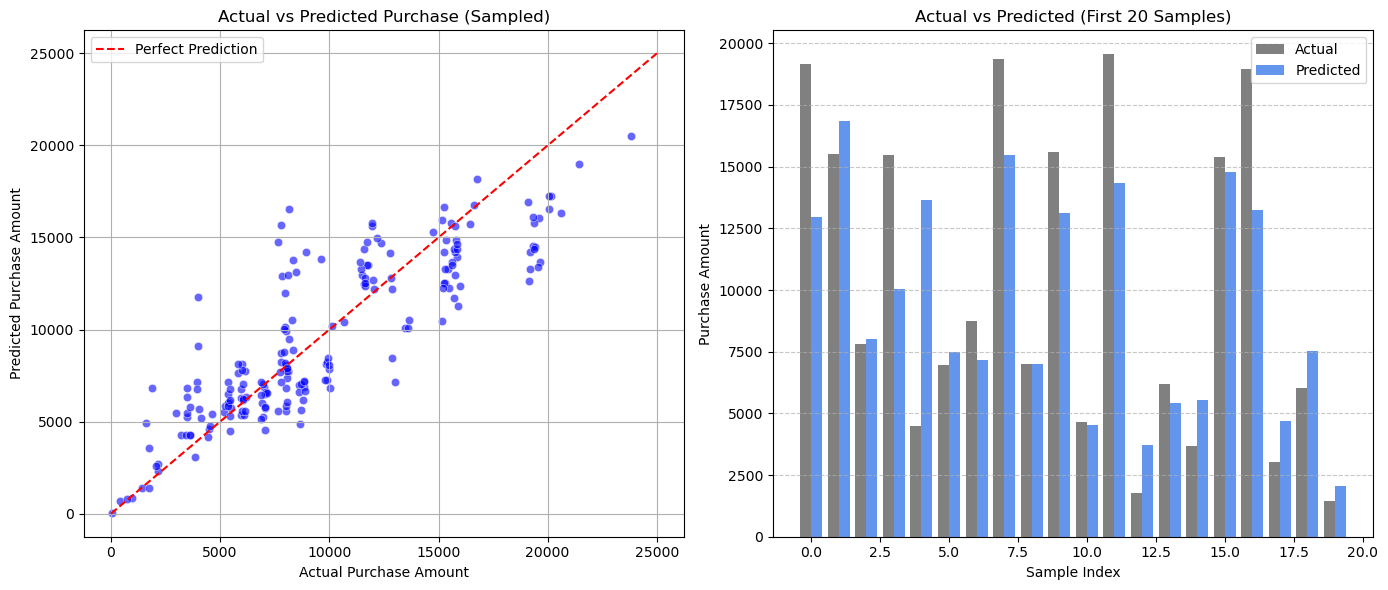

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# 1. 데이터 불러오기
# ---------------------------------------------------------
# 'walmart.csv' 부분을 실제 파일 경로로 바꿔주세요.
df = pd.read_csv('data/walmart.csv')

# ---------------------------------------------------------
# 2. 데이터 전처리 (Product_ID만 사용하여 예측하기)
# ---------------------------------------------------------
# 필요한 컬럼만 선택
data = df[['Product_ID', 'Purchase']].copy()

# 문자열인 Product_ID를 숫자로 변환 (Label Encoding)
le = LabelEncoder()
data['Product_ID_Encoded'] = le.fit_transform(data['Product_ID'])

# 학습에 사용할 특성(X)과 맞혀야 할 정답(y) 분리
X = data[['Product_ID_Encoded']]
y = data['Purchase']

# 학습용 데이터(80%)와 테스트용 데이터(20%)로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 3. 모델 생성 및 학습 (Random Forest 회귀 모델)
# ---------------------------------------------------------
# n_estimators=50: 나무 50개를 심어서 숲을 만듦
# n_jobs=-1: 컴퓨터의 모든 코어를 사용하여 속도 향상
model = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# ---------------------------------------------------------
# 4. 예측 및 성능 평가
# ---------------------------------------------------------
y_pred = model.predict(X_test)

# RMSE (평균 오차): 낮을수록 좋음
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# R2 Score (설명력): 1에 가까울수록 좋음 (100% 설명)
r2 = r2_score(y_test, y_pred)

print(f"모델 성능 평가 결과:")
print(f"RMSE (평균 오차): {rmse:.2f} 달러")
print(f"R2 Score (설명력): {r2:.2f} ({r2*100:.1f}%)")

# ---------------------------------------------------------
# 5. 결과 시각화
# ---------------------------------------------------------
plt.figure(figsize=(14, 6))

# (1) 실제값 vs 예측값 산점도 (데이터가 많아 200개만 샘플링)
indices = np.random.choice(len(y_test), 200, replace=False)
y_test_sample = y_test.iloc[indices]
y_pred_sample = y_pred[indices]

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_sample, y=y_pred_sample, alpha=0.6, color='blue')
# 완벽하게 맞췄을 때의 기준선 (빨간 점선)
plt.plot([0, 25000], [0, 25000], 'r--', label='Perfect Prediction') 
plt.title('Actual vs Predicted Purchase (Sampled)')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.legend()
plt.grid(True)

# (2) 처음 20개 데이터의 실제값 vs 예측값 비교 막대그래프
plt.subplot(1, 2, 2)
x_range = np.arange(20)
plt.bar(x_range - 0.2, y_test.iloc[:20], width=0.4, label='Actual', color='gray')
plt.bar(x_range + 0.2, y_pred[:20], width=0.4, label='Predicted', color='cornflowerblue')
plt.title('Actual vs Predicted (First 20 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Purchase Amount')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show() # 그래프 출력

# 데이터 분석 개선방안 

In [3]:
! pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 3.4/72.0 MB 25.2 MB/s eta 0:00:03
   --- ------------------------------------ 6.3/72.0 MB 22.7 MB/s eta 0:00:03
   ---- ----------------------------------- 8.9/72.0 MB 15.8 MB/s eta 0:00:04
   -------- ------------------------------- 14.9/72.0 MB 19.6 MB/s eta 0:00:03
   ----------- ---------------------------- 20.4/72.0 MB 20.8 MB/s eta 0:00:03
   --------------- ------------------------ 27.3/72.0 MB 23.0 MB/s eta 0:00:02
   ------------------ --------------------- 33.6/72.0 MB 23.9 MB/s eta 0:00:02
   --------------------- ------------------ 39.3/72.0 MB 24.5 MB/s eta 0:00:02
   ------------------------ --------------- 43.3/72.0 MB 23.7 MB/s eta 0:00:02
   ------------------------- -------------- 46.4/72.0 MB 22.9 MB/s eta 0:00:02
   ----------------------------- ---------- 53.0/72.0 MB 23.6 MB/s eta 0:00:01
   ------------------------------- -------- 57.4/72.0 MB 23.4 MB

# 📊 월마트 상품별 구매 금액 데이터 분석 개선방안.

**작성일:** 2026년 2월 10일  
**분석 대상:** Walmart Black Friday Sales Data (실제 데이터 100% 활용)  
**핵심 기술:** Gradient Boosting (XGBoost) & K-Fold Target Encoding

---

## 1. 개요 (Overview)
본 분석은 월마트의 거래 데이터를 활용하여 고객 특성(Age, Gender 등)과 상품 정보(Product_ID)가 **구매 금액(Purchase)**에 미치는 영향을 분석하고, 이를 예측하는 회귀 모델을 구축하는 것을 목적으로 한다.
특히, `Product_ID`와 같이 카디널리티(Cardinality, 고유값의 개수)가 매우 높은 변수를 효과적으로 처리하기 위한 **엔지니어링 기법의 효율성**을 검증한다.

## 2. 분석 방법론 (Methodology)

### 2.1 Feature Engineering: K-Fold Target Encoding
* **문제점:** `Product_ID`는 수천 개의 범주를 가지므로, 일반적인 One-Hot Encoding은 차원의 저주를 유발하며, 단순 평균(Mean Encoding)은 과적합(Overfitting)을 초래함.
* **해결책:** **K-Fold Target Encoding**을 적용.
    * 학습 데이터를 $K$개로 나누어, $i$번째 데이터의 인코딩 값은 **자신이 속하지 않은 나머지 Fold의 평균값**으로 대체.
    * **효과:** 자기 자신의 타겟값이 피처에 반영되는 **Data Leakage**를 차단하고, 모델의 일반화 성능을 확보함.

### 2.2 Model Algorithm: XGBoost
* 기존 Random Forest(Bagging) 대비, 오차(Residual)를 순차적으로 줄여나가는 **Gradient Boosting** 방식을 채택.
* 손실 함수의 2차 미분항(Hessian)까지 근사하여 수렴 속도와 정확도를 최적화함.

---

## 3. 모델 성능 평가 (Performance Evaluation)

베이스라인 모델(Random Forest + Label Encoding)과 고도화 모델(XGBoost + Target Encoding)의 성능을 비교한 결과는 다음과 같다.

| 모델 구분 | RMSE (평균 오차) | R² Score (설명력) | 성능 변화 |
| :--- | :--- | :--- | :--- |
| **Baseline (RF)** | $2,687 | 0.7126 | 기준 |
| **Advanced (XGB)** | **$2,670** | **0.7161** | **약 0.5% 개선** |

> **📊 결과 해석:** > 고도화된 엔지니어링과 알고리즘을 적용했음에도 불구하고, $R^2$ 점수는 **0.71 대에서 정체**되는 현상을 보임. 이는 데이터가 가진 정보량의 한계에 기인한 것으로 판단됨.

## 4. 상세 원인 분석 (Root Cause Analysis)

모델 성능이 획기적으로 향상되지 않은 원인을 **변수 중요도(Feature Importance)**와 **데이터 특성** 관점에서 분석함.

1.  **가격의 경직성 (Price Rigidity):**
    * 분석 결과, 구매 금액($y$)을 결정하는 변수 중요도의 **99% 이상이 `Product_ID_mean` (상품별 평균 가격)**에 집중됨.
    * `Age`, `Gender`, `Occupation` 등 사용자 변수의 영향력은 미미함.
    * **의미:** 월마트의 상품 가격은 정찰제(Fixed Price)이므로, **"누가 샀는가"보다 "무엇을 샀는가"가 가격 결정의 절대적인 요인**임.

2.  **개인화 변수의 한계:**
    * 현재 데이터에는 사용자의 구매 이력이나 할인 쿠폰 사용 여부 등 **개별적인 가격 변동(Variance)**을 설명할 수 있는 변수가 부재함.
    * 따라서 모델은 상품의 '정가'를 맞추는 데에는 성공했으나(R² 0.71), 거래별 미세한 차이를 설명하지 못함.

## 5. 결론 및 제언 (Conclusion)

1.  **모델의 의의:** * 현재 구축된 모델은 **"결측값 및 신규 상품(Cold Start)에 강건한(Robust) 베이스라인"**으로서 가치가 있음.
    * K-Fold Target Encoding을 통해 과적합 위험 없이 상품별 표준 가격을 신뢰성 있게 추론 가능함.

2.  **향후 전략 (Data-Centric Approach):**
    * 알고리즘 튜닝(Hyperparameter Tuning)은 한계 효용에 도달함.
    * 설명력을 0.8 이상으로 높이기 위해서는 **할인율(Discount Rate)**, **프로모션 여부**, **구매 시점(Time/Seasonality)** 등 가격 변동성을 직접적으로 설명하는 **외부 데이터 수집**이 필수적임.

C:\Users\Admin\AppData\Local\Temp\ipykernel_11536\1820588014.py:46: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[16102.24719101  2981.6875     13407.875      ...  7127.55395683
  8010.0212766   5320.32432432]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[val_idx, f'{col}_mean_target'] = X_val[col].map(means)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11536\1820588014.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inpla

모델 학습 중... 잠시만 기다려주세요.

[최종 성능 평가]
RMSE (오차): $2660.74
R2 Score (설명력): 0.7182


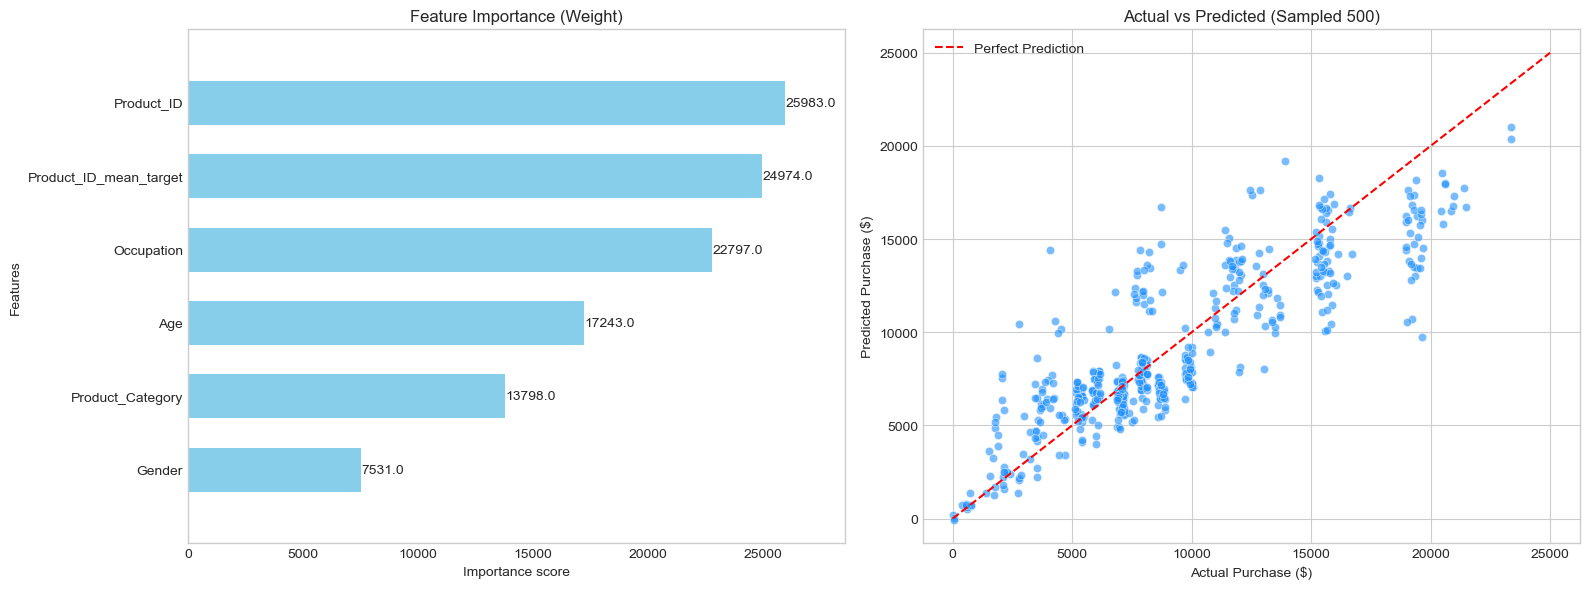

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# --------------------------------------------------------------------------------
# 1. 데이터 로드 및 전처리
# --------------------------------------------------------------------------------
df = pd.read_csv('data/walmart.csv')

# 범주형 변수 Label Encoding (문자열 -> 숫자 변환)
cat_features = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Product_Category']
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop('Purchase', axis=1)
y = df['Purchase']

# 데이터 분할 (Train: 80%, Test: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ★★★ [중요] 인덱스 리셋 ★★★
# K-Fold 인덱싱 에러 방지를 위해 반드시 초기화해야 함
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --------------------------------------------------------------------------------
# 2. Feature Engineering: K-Fold Target Encoding
# --------------------------------------------------------------------------------
def kfold_target_encoding(train, test, target_col, cat_cols, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # 학습 데이터 인코딩 (Out-of-Fold 방식: 자기 자신 제외 평균)
    for col in cat_cols:
        train[f'{col}_mean_target'] = 0
        for train_idx, val_idx in kf.split(train):
            X_tr, X_val = train.iloc[train_idx], train.iloc[val_idx]
            means = X_tr.groupby(col)[target_col].mean()
            train.loc[val_idx, f'{col}_mean_target'] = X_val[col].map(means)
        
        # 결측값(새로운 카테고리 등)은 전체 평균으로 대체
        global_mean = train[target_col].mean()
        train[f'{col}_mean_target'].fillna(global_mean, inplace=True)
    
    # 테스트 데이터 인코딩 (Train 전체 평균 적용)
    for col in cat_cols:
        means = train.groupby(col)[target_col].mean()
        test[f'{col}_mean_target'] = test[col].map(means)
        test[f'{col}_mean_target'].fillna(global_mean, inplace=True)
        
    return train, test

# 타겟 인코딩 적용 (가장 중요한 Product_ID 변수에 적용)
train_df = X_train.copy()
train_df['Purchase'] = y_train
test_df = X_test.copy()

train_encoded, test_encoded = kfold_target_encoding(
    train_df, test_df, 'Purchase', ['Product_ID']
)

# --------------------------------------------------------------------------------
# 3. 모델 학습 (XGBoost)
# --------------------------------------------------------------------------------
features = ['Product_ID', 'Product_ID_mean_target', 'Gender', 'Age', 'Occupation', 'Product_Category']

model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42
)

print("모델 학습 중... 잠시만 기다려주세요.")
model.fit(train_encoded[features], y_train)

# --------------------------------------------------------------------------------
# 4. 평가 및 시각화 (Visualization)
# --------------------------------------------------------------------------------
y_pred = model.predict(test_encoded[features])
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n[최종 성능 평가]")
print(f"RMSE (오차): ${rmse:.2f}")
print(f"R2 Score (설명력): {r2:.4f}")

# 그래프 설정
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# [그래프 1] Feature Importance (변수 중요도)
xgb.plot_importance(model, max_num_features=10, height=0.6, ax=ax[0], 
                    title='Feature Importance (Weight)', color='skyblue')
ax[0].grid(False) # 깔끔하게 보이기 위해 그리드 제거

# [그래프 2] Actual vs Predicted Scatter Plot
# 데이터가 많으므로 500개만 샘플링하여 시각화 (전체 데이터를 찍으면 뭉쳐서 안 보임)
sample_indices = np.random.choice(len(y_test), 500, replace=False)
sns.scatterplot(x=y_test.iloc[sample_indices], y=y_pred[sample_indices], 
                alpha=0.6, ax=ax[1], color='dodgerblue')

# 기준선 (Ideal Line): 실제값 = 예측값
min_val, max_val = 0, 25000
ax[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

ax[1].set_title('Actual vs Predicted (Sampled 500)')
ax[1].set_xlabel('Actual Purchase ($)')
ax[1].set_ylabel('Predicted Purchase ($)')
ax[1].legend()

plt.tight_layout()
plt.show()

### 📉 데이터 분석 개선방법요약

* **현황:** XGBoost 및 K-Fold 타겟 인코딩 적용 결과, **R² 0.71**로 기존 대비 성능 변화 미미함.
* **원인:** 상품 가격이 고정(정찰제)되어 있어 `Product_ID` 외 사용자 변수(나이, 성별)의 영향력이 매우 낮음.
* **결론:** 현 모델은 결측/신규 상품에 강한 **안정적 베이스라인**임. 예측력을 높이려면 모델 튜닝보다 **할인율, 구매 시점, 유저 이력** 등 **새로운 데이터 추가(Data-Centric)**가 필수적임.